**SINGLE LINEAR REGRESSION**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# 'sklearn.linear_model' = PACKAGE FAMILY LIBRARY
# 'LinearRegression' =  ALGORITHM

In [5]:
# IMPORTING RAW DATA

df1 = pd.read_csv('/content/Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
# INFO OF RAW DATA FROM DATAFRAME

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
# divide data into " input and output "
# both input and output supposed to be in a " numpy array "
# sklearn accepts inputs in 2 dimensional numpy array & output in 1 dimension numpy array

'''
x = df1[['YearsExperience']].values
y = df1['Salary'].values
# y = df.iloc[:,-1].values
'''
x = df1.iloc[:,[0]].values
y = df1.iloc[:,1].values




In [8]:
# 2D - INPUT - NUMPY ARRAY

x  

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
# 1D - OUTPUT - NUMPY ARRAY
# ACTUAL OUTPUT

y  

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
print("dim of x = " , x.ndim)
print("dim of y = " , y.ndim)

dim of x =  2
dim of y =  1


In [11]:
# calling the linear regression algorithm  

model = LinearRegression()

# " TRAINING THE MACHINE " /fitting the model / creating a new model 

model.fit(x,y) 

LinearRegression()

In [12]:
# " PREDICTED OUPUTS " by the newly created machine learning model 
y_pred  = model.predict(x)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [13]:
print("len of actual output= ", len(y))
print("len of predicted output= ", len(y_pred))

len of actual output=  30
len of predicted output=  30


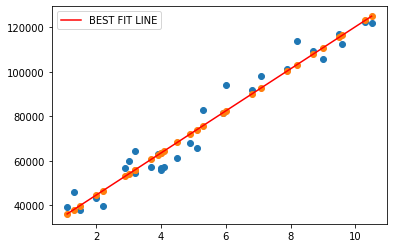

In [14]:
# DATA VISUALISATION

# ACTUAL OUTPUT
plt.scatter(x,y)

# PREDICTED OUTPUT
plt.scatter(x,y_pred)
plt.plot(x,y_pred , color = 'red' , label = 'BEST FIT LINE')
plt.legend()
plt.show()

In [15]:
#to find m value i.e slope 
print(model.coef_)

#to find c value i.e intercept 
print(model.intercept_)

# for 1.1 years of exp 
print(model.predict([[1.1]]))
# we get 36187 as the predicted output for 1.1 yrs of experience because of y = m*x+c
# 9449.96232146*1.1+25792.200198668696


# for 1.5 years of exp 
print(model.predict([[1.5]]))

[9449.96232146]
25792.200198668696
[36187.15875227]
[39967.14368085]


**REGRESSION SCORE**

In [16]:
# co-efficient of determination / regression score
# max value is 1.0 (like accuracy for regression problems)
from sklearn.metrics import r2_score 
r2_score(y,y_pred)

0.9569566641435086

In [17]:
# MODEL PERSISTANCE (creating a file to share and use it elsewhere as a model)
# pickling
# TWO STEPS  :-

# 1. Serialization step (creating the file and storing the model inside it) 
# 2. Deserialization step (using the stored model in realtime applications (ex - in your website, in your mobile app))

In [18]:
import pickle 

# storing a model inside a file
# wb - write byte
pickle.dump(model,open("linear.pkl","wb")) 

In [19]:
#deserialization step 
import pickle
reload_model = pickle.load(open("linear.pkl","rb"))

In [22]:
# It will give the req output wrt of 1 input value (i.e., years of experience)

reload_model.predict([[14]])

array([158091.67269904])